<h1 style="color: #007bff;"><center>How do Pharmaceutical Valuations React to Tragedies?</center></h1>
<ul>
<li>Group Number: 21</li>
<li>Student: Karston Kuciemba</li>
<li>UT EID: ktk654</li>
<li>Student: Ananya Kaalva</li>
<li>UT EID: ak46562</li>
<li>Student: Carolyn Pyun</li>
<li>UT EID: cgp755</li>
<li>Date:  3/16/2024</li>
</ul>

In [74]:
# import needed libraries
import numpy as np
import pandas as pd
import math
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot

<h3 style="padding-left: 30px; color: #007bff;">Read in dataframes for visualization</h3>

In [75]:
# covid dfs
tickers = ['LLY', 'JNJ', 'MRK', 'ABBV', 'MRNA', 'PFE', 'AMGN', 'PPH', 'IHE', 'PJP']

covid_dfs= {}

for symbol in tickers:
    # for each symbol, load the pkl file and store it in the dictionary as a df
    covid_dfs[f"{symbol}_df-covid"] = pd.read_csv(f"../pharma-data/merged-dfs/{symbol}_df-covid.csv", parse_dates=True)

# remove last 182 lines bc it is 0 covid deaths (stopped reporting)
for symbol in tickers:
    covid_dfs[f"{symbol}_df-covid"] = covid_dfs[f"{symbol}_df-covid"].iloc[:-182]

for symbol in tickers:
    covid_dfs[f"{symbol}_df-covid"] = covid_dfs[f"{symbol}_df-covid"].rename(columns={"Unnamed: 0": "Date"})

In [76]:
# overdose dfs
tickers = ['LLY', 'JNJ', 'MRK', 'ABBV', 'MRNA', 'PFE', 'AMGN', 'PPH', 'IHE', 'PJP']

overdose_dfs= {}

for symbol in tickers:
    # for each symbol, load the pkl file and store it in the dictionary as a df
    overdose_dfs[f"{symbol}_df-overdose"] = pd.read_csv(f"../pharma-data/merged-dfs/{symbol}_df-overdose.csv", parse_dates=True)

for symbol in tickers:
    overdose_dfs[f"{symbol}_df-overdose"] = overdose_dfs[f"{symbol}_df-overdose"].rename(columns={"Unnamed: 0": "Date"})

# <center style="text-align: center; color: #007bff;">Visualization 1</center>

<h3><center style="color: #DE3163;"><strong>Goal of Visual:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
       The purpose of this visualization is to show the variance in pharmaceutical stock prices as it relates to COVID-19. How large were the discrepencies between COVID-19 treatment and/or prevention-related companies vs. non-related ones?
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visualization Tools:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Altair (Bar Chart & Lines)
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Argument Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Some companies performed much greater than others. Is this just noise? While the market is unpredictable and no one can know for certain, there is an
        extent of confidence that can be attributed to the idea that any entity with the possibility of treating COVID-19.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        These companies performed "better": LLY (332%), MRNA (702%). This may be expected because, well, they were vaccine providers! This raises the larger question - is decentralizing vaccinations economically efficient? Should it be for-profit, or should there be other ways, such as privatizing retainers for disasters such as COVID-19 or even creating government entities for these events.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Our analysis found that COVID-19 deaths and the stock prices of vaccine providers were actually positive, albeit very small, compared to non-vaccine providers that were experiencing negative correlations as COVID-19 deaths rose. This discrepancy was found to be statistically significant at the 10% level.
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visual Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        I'd like to point your attention to the first large spike in COVID-19 deaths - the two largest spikes in stock prices were LLY (63% increase) and MRNA (176% increase), which were both vaccine providers. Now, obviously, they would increase as shown because they're being paid for their services by the United States government. What is fascinating is that AFTER the spike those two continued their positive trend, though their production of vaccines was already public knowledge.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        This chart combines multiple dataframes into a single graphic. On hover, each stock line will share its ticker, date, closing price, and corresponding COVID-19 related deaths for that day. To allow for specific analysis of each stock, you can scroll, expand, and zoom into the chart. The COVID-19 US deaths are displayed as a background on the chart to allow for ease of understanding when there are spikes, which is also shown in the legend.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        To allow for easier comparison, we used a logarithmic graph so the lower priced stocks didn't seem to stay stagnant. Orignally, we had vertically concatenated the COVID deaths on the chart, but rather than using a selection interval to compare certain times, we felt the overlay suited it better.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        TWe used the built-in scheme from altair called "category20" which is essentially a color palette that allows for different categories (or in our case stocks) for each ticker, rather than having a gradient of colors that may be hard to differentiate. We also lowered the opacity to a light grey background for the COVID deaths so it is somewhat easier to see.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Our legend is quite simple and allows the viewer to compare the stock price color with its corresponding ticker.
    </li>
</ul>

In [77]:
def show_graph1():
        
    stock_lines = None

    # loop through each df in covid_dfs. for each one, plot their prices over time
    for symbol in tickers:
        # create a line for each symbol with a unique color
        stock_line = alt.Chart(covid_dfs[f"{symbol}_df-covid"]).mark_line().encode(
            x=alt.X('Date:T', axis=alt.Axis(format='%m/%Y')),
            y=alt.Y('Close:Q').scale(type='log'),
            color=alt.Color('symbol:N', scale=alt.Scale(scheme='category20')),
            tooltip=[alt.Tooltip('symbol:N', title='Ticker'), alt.Tooltip('Date:T', title='Date'), alt.Tooltip('Close:Q', title='Closing Price'), alt.Tooltip('US covid deaths:Q', title='US COVID Deaths')]
        ).properties(
            title="Stock Prices during COVID",
            width=1000,
            height=450
        ).transform_calculate(
            symbol=f"'{symbol}'"  # pass the symbol value into the chart
        ).interactive()
        
        # place each new line chart on combined chart
        if stock_lines is None:
            stock_lines = stock_line
        else:
            stock_lines += stock_line

    # create area chart for covid deaths (choose random df because they all have the same covid deaths)
    covid_deaths_area = alt.Chart(covid_dfs['LLY_df-covid']).mark_area(color='black', opacity=0.15).encode(
        x=alt.X('Date:T', axis=alt.Axis(format='%m/%Y')),
        y=alt.Y('US covid deaths:Q'),
    )

    final_chart = alt.layer(covid_deaths_area, stock_lines).resolve_scale(y='independent')

    return final_chart
show_graph1()


alt.LayerChart(...)

# <center style="text-align: center; color: #007bff;">Visualization 2</center>

<h3><center style="color: #DE3163;"><strong>Goal of Visual:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
       The goal of this visualization is to illustrate the time series of US COVID deaths and US overdose deaths, along with their respective rolling mean and rolling standard deviation, to analyze trends and variability over time.
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visualization Tools:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Matplotlib (Time Series)
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Argument Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        There may be periods of increased or decreased mortality rates, as indicated by deviations from the rolling mean and fluctuations in the rolling standard deviation, potentially reflecting changes in public health measures, interventions, or other external factors.
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visual Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
       The COVID graph shows a noticeable increase in deaths during the initial stages of the pandemic, characterized by spikes and fluctuations, reflecting the rapid spread of the virus and its impact on mortality rates.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
       In contrast to the COVID graph, the overdose statistics exhibit greater fluctuations throughout the entire time period, indicating a less predictable and more volatile trend.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        This chart combines multiple dataframes into two graphics, one for COVID deaths and one for overdose deaths. The legend labels the time series data, the rolling mean, and the rolling standard deviation.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Our legend is quite simple and allows the viewer to compare the stock price color with its corresponding ticker.
    </li>
</ul>

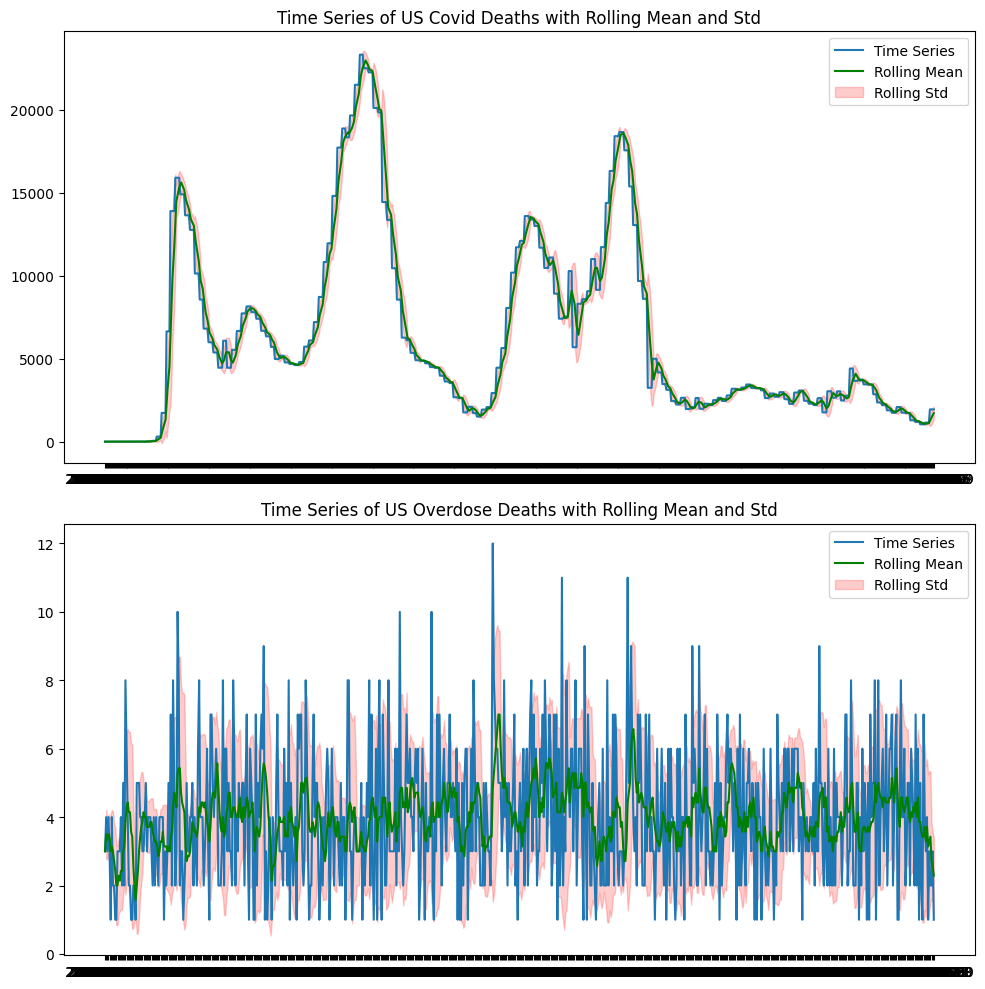

In [78]:
def show_graph2():
    # Choose one dataframe for demonstration (e.g., LLY)
    covid_df = covid_dfs['LLY_df-covid']
    overdose_df = overdose_dfs['LLY_df-overdose']

    rolling_window = 7  # Adjust the window size as needed

    # Calculate rolling mean and standard deviation for COVID deaths
    covid_df['Rolling_Mean'] = covid_df['US covid deaths'].rolling(window=rolling_window, min_periods=1).mean()
    covid_df['Rolling_Std'] = covid_df['US covid deaths'].rolling(window=rolling_window, min_periods=1).std()

    # Calculate rolling mean and standard deviation for overdose deaths
    overdose_df['Rolling_Mean'] = overdose_df['US Overdose Deaths'].rolling(window=rolling_window, min_periods=1).mean()
    overdose_df['Rolling_Std'] = overdose_df['US Overdose Deaths'].rolling(window=rolling_window, min_periods=1).std()

    # Plotting using Matplotlib
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))

    # Plot for COVID deaths
    axes[0].plot(covid_df['Date'], covid_df['US covid deaths'], label='Time Series')
    axes[0].plot(covid_df['Date'], covid_df['Rolling_Mean'], label='Rolling Mean', color='green')
    axes[0].fill_between(covid_df['Date'], covid_df['Rolling_Mean'] - covid_df['Rolling_Std'], 
                        covid_df['Rolling_Mean'] + covid_df['Rolling_Std'], color='red', alpha=0.2, label='Rolling Std')
    axes[0].set_title('Time Series of US Covid Deaths with Rolling Mean and Std')
    axes[0].legend()

    # Plot for overdose deaths
    axes[1].plot(overdose_df['Date'], overdose_df['US Overdose Deaths'], label='Time Series')
    axes[1].plot(overdose_df['Date'], overdose_df['Rolling_Mean'], label='Rolling Mean', color='green')
    axes[1].fill_between(overdose_df['Date'], overdose_df['Rolling_Mean'] - overdose_df['Rolling_Std'], 
                        overdose_df['Rolling_Mean'] + overdose_df['Rolling_Std'], color='red', alpha=0.2, label='Rolling Std')
    axes[1].set_title('Time Series of US Overdose Deaths with Rolling Mean and Std')
    axes[1].legend()

    plt.tight_layout()
    plt.show()
show_graph2()



# <center style="text-align: center; color: #007bff;">Visualization 3</center>

<h3><center style="color: #DE3163;"><strong>Goal of Visual:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        To display the variance (or lack of) overdoses caused by the COVID-19 epidemic.
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visualization Tools:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Pandas (grouping)
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Altair
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Argument Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        An interesting point of note is that overdoses seemingly had no change as a result of the increasing COVID-19 epidemic. Whether it was through social distancing mandates or fear, overdoses saw no significant drop nor rise and was continuously changing throughout the period.
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visual Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        As we see the hills and valleys of the COVID-19 epidemic, we can compare it with the corresponding date and overdose statistics. There is no clear trend or seasonal change in overdoses as a result of COVID-19.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        We added a selection indicator so the viewer can click on a specific date (such as a spike in COVID) and compare it between overdoses and COVID deaths. As a result of this, we see that there is no true effect.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        We placed the charts side-by-side so the viewer can easily understand, when using the selection interval, the effect one statistic had on the other.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        We chose a juxtaposition of blue and gold to represent each respective piece of data because when the user selects a date, the exposure of those colors are much different than the grey background of the non-selected.
    </li>
</ul>

In [79]:
def show_graph3():
    # create a mapping between stock names and numbers
    stock_name_to_number = {stock_name: i+1 for i, stock_name in enumerate(covid_dfs.keys())}

    # list to hold all dfs with stock number as a column
    dfs_with_stock_number = []

    # iterate thru dict items
    for stock_name, df in covid_dfs.items():
        # Add a new column with stock number
        df['Stock_Number'] = stock_name_to_number[stock_name]
        # Append dataframe to the list
        dfs_with_stock_number.append(df)

    # concatenate all dataframes
    combined_df = pd.concat(dfs_with_stock_number, ignore_index=True)

    # create a mapping between stock names and numbers
    stock_name_to_number = {stock_name: i+1 for i, stock_name in enumerate(overdose_dfs.keys())}

    # list to hold all dataframes with stock number as a column
    dfs_with_stock_number2 = []

    # iterate through the dictionary items
    for stock_name, df in overdose_dfs.items():
        # Add a new column with stock number
        df['Stock_Number'] = stock_name_to_number[stock_name]
        # Append dataframe to the list
        dfs_with_stock_number2.append(df)

    # concatenate all dataframes
    combined_df2 = pd.concat(dfs_with_stock_number2, ignore_index=True)

    # display the combined dataframe
    combined_df2['US Covid Deaths'] = combined_df['US covid deaths']

    # convert 'Date' column to datetime type
    combined_df2['Date'] = pd.to_datetime(combined_df2['Date'])

    # group by 'Stock_Number' and by weeks, aggregating without averaging
    grouped_df = combined_df2.groupby(['Stock_Number', pd.Grouper(key='Date', freq='W-MON')]).agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Adj Close': 'last',
        'Volume': 'sum',
        'US Overdose Deaths': 'sum',
        'US Covid Deaths': 'last'
    }).reset_index()

    grouped_df2 = grouped_df[grouped_df.Stock_Number == 1]

    selector = alt.selection_point(fields=['Date'], empty=True)

    chart_states = alt.Chart(grouped_df2).mark_bar().encode(
        x=alt.X('Date:T'),
        y=alt.Y('US Covid Deaths:Q'),
        color=alt.condition(selector, alt.value('darkgoldenrod'), alt.value('lightgray')),
    ).add_params(selector).properties(title = 'US Covid Deaths over Time', width=500, height=300)

    chart_county = alt.Chart(grouped_df2).mark_bar().encode(
        x=alt.X('Date:T'),
        y=alt.Y('US Overdose Deaths:Q'),
        color=alt.condition(selector, alt.value('darkslategray'), alt.value('lightgray')),
    ).properties(title = 'US Overdose Deaths over Time', width=500, height=300)

    return (chart_states | chart_county).resolve_scale(color='independent')
show_graph3()

alt.HConcatChart(...)

# <center style="text-align: center; color: #007bff;">Visualization 4</center>

<h3><center style="color: #DE3163;"><strong>Goal of Visual:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        The purpose of this visualization is to focus on the behavior of Moderna stock prices with respect to covid deaths due to the clear and interesting trend observed in visualization 1 over the course of the pandemic.
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visualization Tools:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Pandas
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Matplotlib
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Seaborn
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Argument Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        We would assume that the maximum numbers of Covid deaths would occur prior to the sharp rise in Moderna stock prices, but we do observe some peaks in deaths after the peak performance period, which we can attribute to virus mutations causing variant illnesses for which the original vaccine proved innefective without the development of a booster.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Overall, the sharp increase in stock prices directly after the first period of high Covid deaths can be associated with the success of the Covid vaccine development, indicating that vaccine companies particularly benefitted from the demand created by the pandemic.
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visual Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        We observe that there is an association with the periods of high Covid deaths and stock performance.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        We weighed the sizes of the bubbles using the numbers of Covid deaths during the time period in question. We also included a color gradient for a clearer visualization of higher Covid death time periods, with darker colors indicating a greater number of deaths. The viewer can therefore use either the color or the size of the bubbles as indicators of this variable.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        We overlayed a black line plot for the viewer to clearly observe the behavior of the Moderna stock prices over the bubbles.
    </li>
</ul>

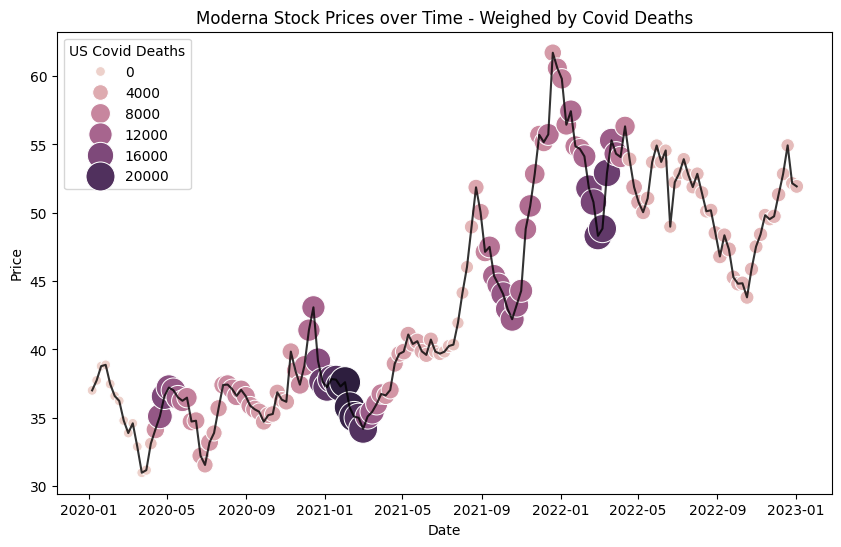

In [80]:
def show_graph4():
    # create a mapping between stock names and numbers
    grouped_df2 = grouped_df[grouped_df.Stock_Number == 6]
    grouped_df3 = grouped_df[grouped_df.Stock_Number == 1]

    final = pd.DataFrame()
    final['Date'] = grouped_df3['Date']
    final['High'] = list(grouped_df2['High'])
    final['US Covid Deaths'] = grouped_df3['US Covid Deaths']

    # convert 'date' column to datetime
    final['Date'] = pd.to_datetime(final['Date'])

    # create the bubble chart
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=final, x='Date', y='High', size='US Covid Deaths', hue='US Covid Deaths', sizes=(50, 500), legend=True)
    plt.plot(final['Date'], final['High'], alpha = 0.8, color = 'black')

    # set labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Moderna Stock Prices over Time - Weighed by Covid Deaths')

    # show the plot
    return plt.show()
show_graph4()

# <center style="text-align: center; color: #007bff;">Visualization 5</center>

<h3><center style="color: #DE3163;"><strong>Goal of Visual:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        To visualize the pairwise correlation between COVID deaths, overdose deaths, and pharmaceutical stock prices.
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visualization Tools:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Altair
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Seaborn
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Argument Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Companies with positive correlations between their stock prices and COVID/overdose deaths might indicate some level of dependence on pandemic-related factors.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Companies with negative correlations might have performed better amidst the pandemic due to their resilience or unrelated market factors.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Identifying clusters of highly correlated companies can help understand sector-wide trends or responses to external events.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Correlation values closer to 1 or -1 signify strong relationships, while values closer to 0 indicate weak or no correlation.
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visual Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        A symmetric heatmap grid where each cell represents the correlation between two variables.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Tooltips, selection highlighting, and dynamic sorting
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Color gradients indicating the strength and direction of correlation, with a color scale legend for interpretation.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Axis labels indicating the variables being correlated (e.g., COVID deaths, overdose deaths, and stock prices).
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Annotations or tooltips displaying the correlation coefficient values for each pair of variables.
    </li>
</ul>

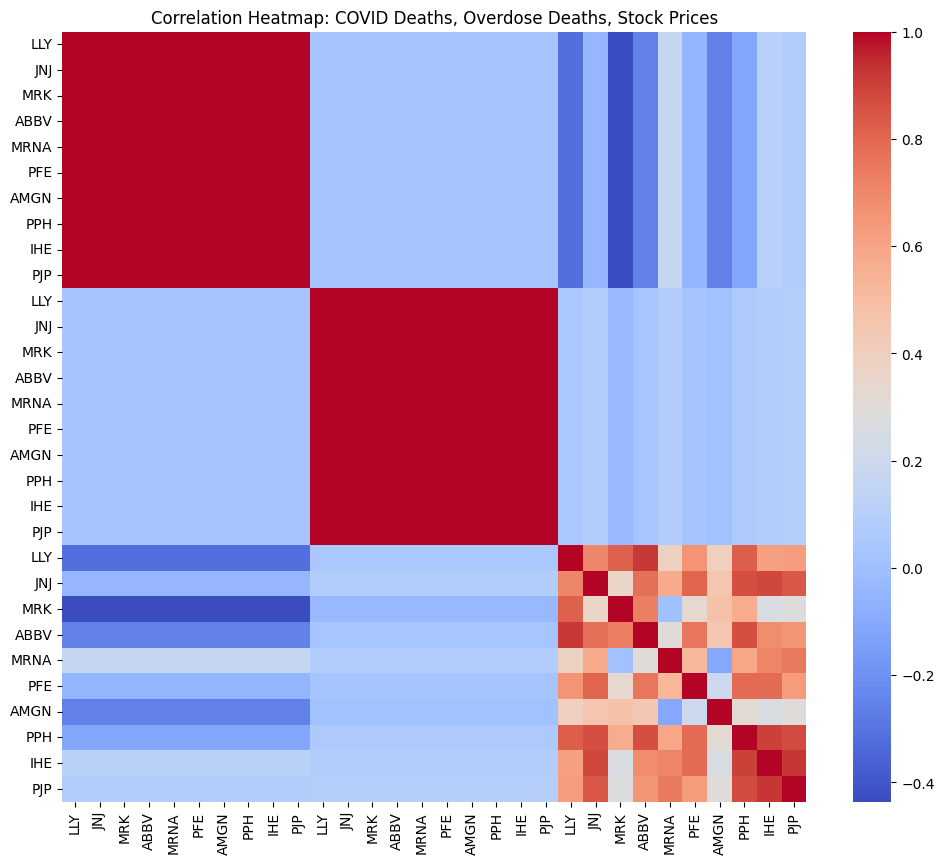

In [81]:
def show_graph5():
    # initialize empty dfs
    combined_covid_deaths_df = pd.DataFrame()
    combined_overdose_deaths_df = pd.DataFrame()
    combined_stock_prices_df = pd.DataFrame()

    # combine COVID death data into one df
    for symbol in tickers:
        covid_deaths_dfs = covid_dfs[f"{symbol}_df-covid"]['US covid deaths']              
        combined_covid_deaths_df = pd.concat([combined_covid_deaths_df, covid_deaths_dfs], axis=1)

    combined_covid_deaths_df.columns = tickers

    # combine overdose death data into one DataFrame
    for symbol in tickers:
        overdose_deaths_dfs = overdose_dfs[f"{symbol}_df-overdose"]['US Overdose Deaths']
        combined_overdose_deaths_df = pd.concat([combined_overdose_deaths_df, overdose_deaths_dfs], axis=1)

    combined_overdose_deaths_df.columns = tickers

    # combine stock prices data into one DataFrame
    for symbol in tickers:
        stock_prices_dfs = covid_dfs[f"{symbol}_df-covid"]['Close']
        combined_stock_prices_df = pd.concat([combined_stock_prices_df, stock_prices_dfs], axis=1)

    combined_stock_prices_df.columns = tickers

    # combine all data into one DataFrame
    combined_df = pd.concat([combined_covid_deaths_df, combined_overdose_deaths_df, combined_stock_prices_df], axis=1)

    # calculate correlations
    correlation_matrix = combined_df.corr()

    # plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, cmap='coolwarm')
    plt.title('Correlation Heatmap: COVID Deaths, Overdose Deaths, Stock Prices')
    return plt.show()
show_graph5()

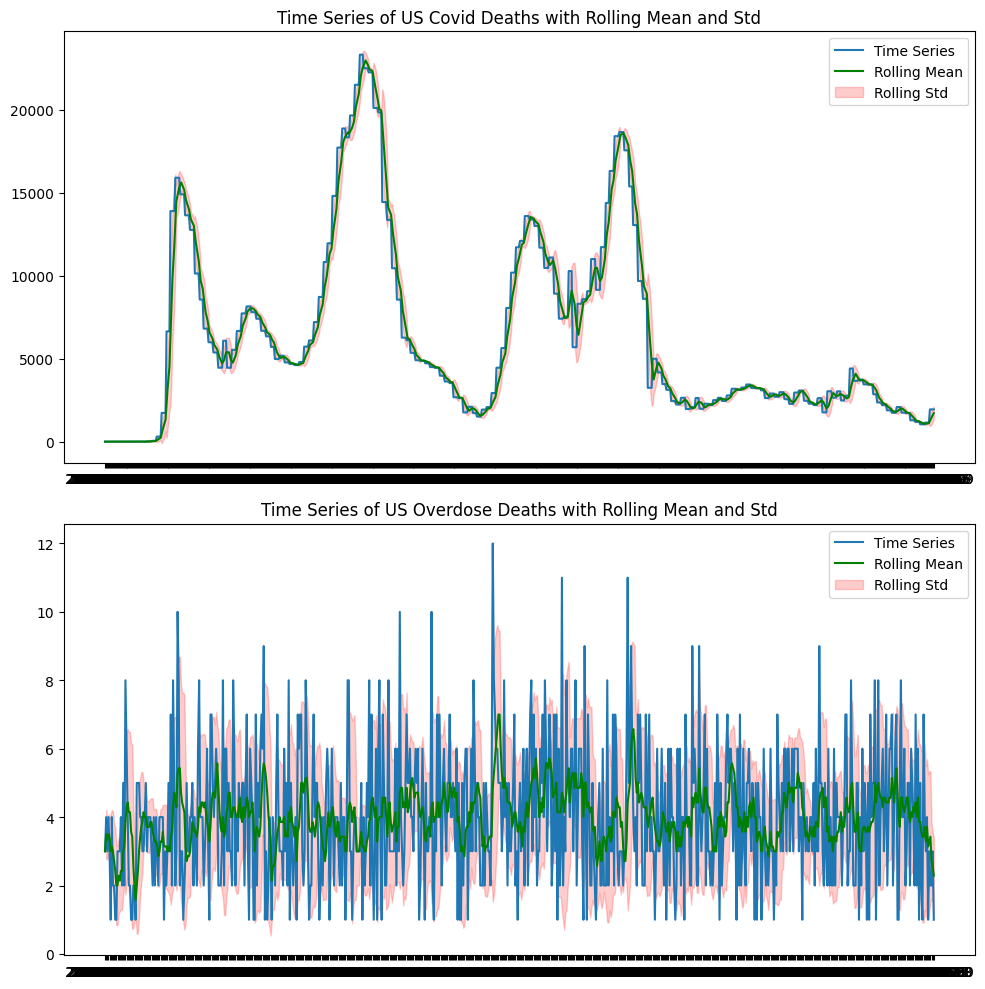

In [82]:
show_graph1()